<a href="https://colab.research.google.com/github/yimeiwen/molecularsolubility/blob/main/Molecular_Solubility_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Install PyCaret**

In [1]:
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2. Read in dataset**

In [2]:
import pandas as pd

In [8]:
dataset = pd.read_csv('solubility_with_descriptors_p2.csv')

In [9]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **3. Model Building**

In [5]:
from pycaret.regression import *

In [10]:
model = setup(data = dataset, target = 'logS', train_size=0.8, silent=True)

,Description,Value
0,session_id,8700
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='logS',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

### **Model comparison**

Subsequent blocks of codes will be using the ``training set`` (the 80% subset) for model building.

In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5162,0.5344,0.7255,0.8739,0.2049,0.6691,0.393
rf,Random Forest Regressor,0.5341,0.5545,0.7372,0.8685,0.2091,0.6895,0.520
lightgbm,Light Gradient Boosting Machine,0.5565,0.5796,0.7559,0.8632,0.2163,0.7572,0.097
gbr,Gradient Boosting Regressor,0.5803,0.5834,0.7598,0.8632,0.2209,0.7010,0.067
ada,AdaBoost Regressor,0.7057,0.8279,0.9076,0.8058,0.2490,0.8755,0.061
dt,Decision Tree Regressor,0.6721,0.9202,0.9557,0.7856,0.2729,0.9095,0.013
lar,Least Angle Regression,0.7799,1.0220,1.0082,0.7615,0.2947,0.9036,0.011
br,Bayesian Ridge,0.7806,1.0221,1.0082,0.7615,0.2946,0.9045,0.009
ridge,Ridge Regression,0.7801,1.0220,1.0082,0.7615,0.2947,0.9038,0.011
lr,Linear Regression,0.7799,1.0220,1.0082,0.7615,0.2947,0.9036,0.254


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False)

### **Model Creation**

In [16]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5946,0.6074,0.7794,0.8481,0.1868,0.3512
1,0.5068,0.4771,0.6907,0.8963,0.1986,0.2480
2,0.4815,0.4081,0.6388,0.9187,0.1505,0.3484
3,0.6259,0.8429,0.9181,0.7908,0.2651,0.6695
4,0.4421,0.3775,0.6144,0.9218,0.1768,0.1948
5,0.5089,0.5225,0.7228,0.8950,0.2231,2.4724
6,0.4630,0.3961,0.6294,0.9013,0.1821,0.2524
7,0.4675,0.4682,0.6843,0.8733,0.2314,0.7289
8,0.5212,0.6095,0.7807,0.8693,0.2135,0.4652


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### **4. Model Analysis**

#### **4.1. Plot Models**


**Residuals Plot**

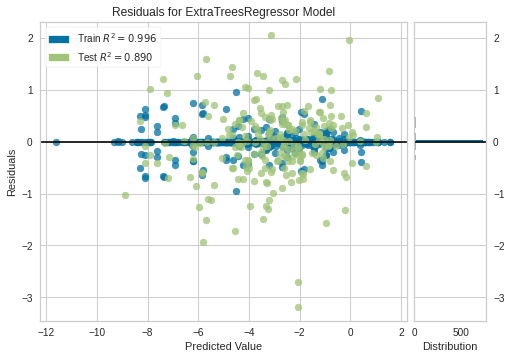

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(et, 'residuals')

**Prediction Error Plot**

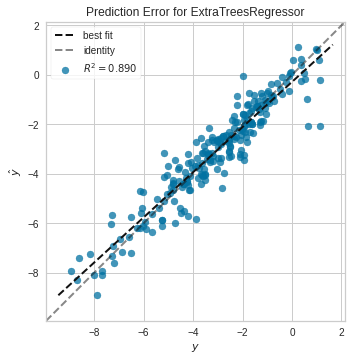

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(et, 'error')

**Cooks Distance Plot**

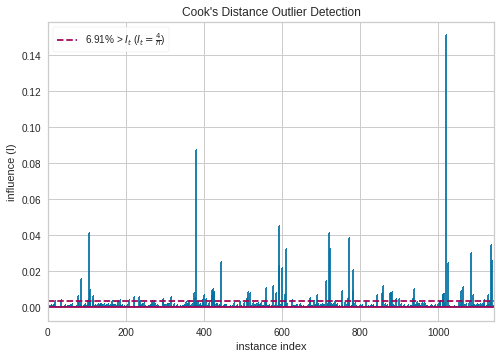

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

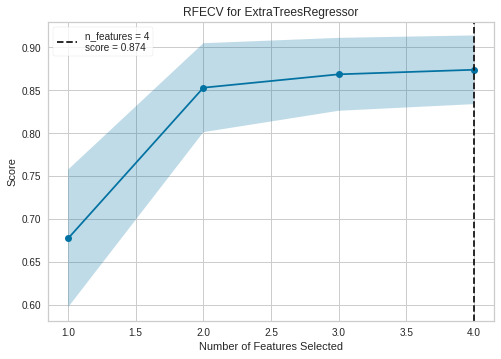

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(et, 'rfe')

**Learning Curve**

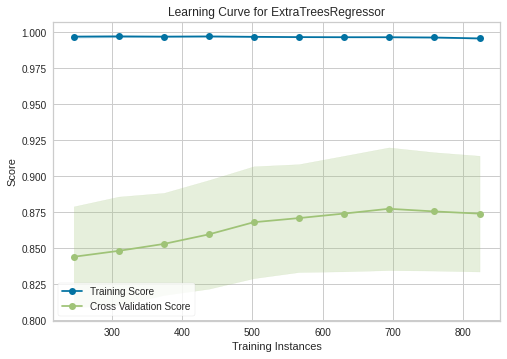

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(et, 'learning')

**Validation Curve**

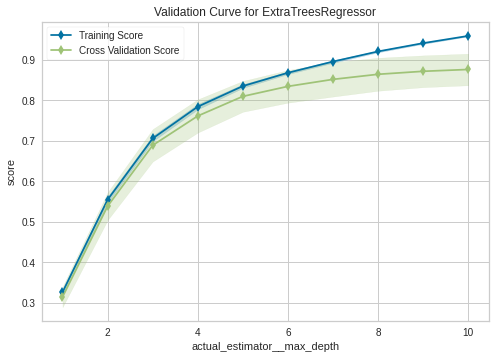

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(et, 'vc')

**Manifold Learning**

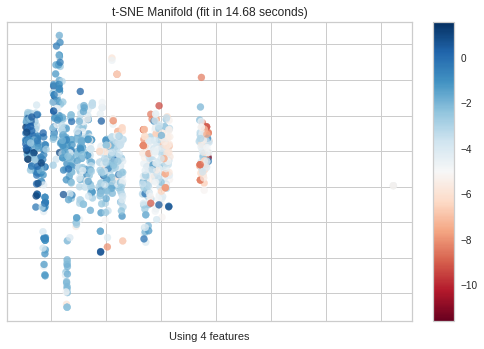

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(et, 'manifold')

**Feature Importance**

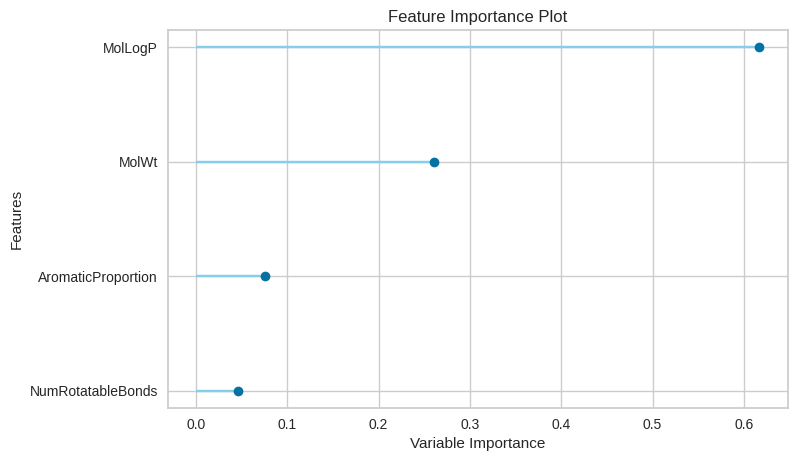

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [28]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Show all plots**

 ``evaluate_model()`` displays all 

In [31]:
evaluate_model(et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### **4.2. Model Interpretaion**

In [35]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.0 MB/s 


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


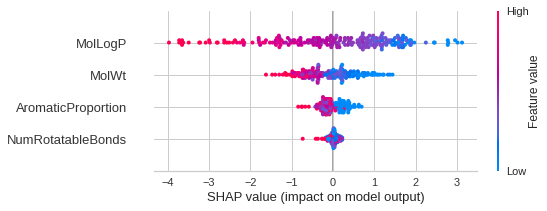

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [36]:
interpret_model(et)

**Correlation Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=correlation, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: type 2


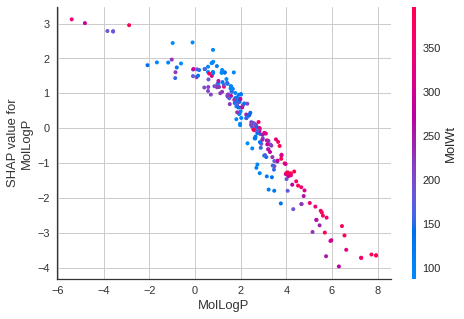

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [37]:
interpret_model(et, plot = 'correlation')

In [38]:
interpret_model(et, plot = 'reason', observation = 10)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=10, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


### **5. External Testing**
Apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [39]:
prediction_holdout = predict_model(et)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8700, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5062,0.4859,0.697,0.89,0.187,0.3422


In [40]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,5.9290,320.045990,3.0,0.666667,-6.510,-7.20000
1,2.5882,175.000000,0.0,0.750000,-2.700,-2.67000
2,1.0262,30.070000,0.0,0.000000,-1.360,-1.05300
3,2.5282,193.246002,2.0,0.428571,-2.863,-2.78473
4,5.7605,350.458008,6.0,0.461538,-5.240,-6.09600


---